### Case Study - Healthcare Data Analysis

### Business Problem:

The Cloudera Data Science Challenge 2 (in 2014) involved detecting anomalies in the United States Medicare insurance system. Finding anomalous patients, procedures, providers, and regions in the competition’s large, complex, and intertwined data sets required industrial-strength tools for data wrangling and machine learning.
The objective of the Cloudera Data Science Challenge 2 was to uncover anomalous patients, procedures, providers, and regions in the United States government’s Medicare health insurance system (Cloudera 2014).

### Problem Summary:

The Challenge was divided into the following three parts, each of which had specific requirements that pertained to identifying anomalous entities in different aspects of the Medicare system:

Part 1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

Part 2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.

Part 3: Identify 10,000 Medicare patients who are involved in anomalous activities.

### Import necessary libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
medicare_charge_inpatient = pd.read_csv('Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')
medicare_charge_inpatient.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [3]:
medicare_charge_outpatient = pd.read_csv('Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')
medicare_charge_outpatient.head()

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [4]:
medicare_provider_charge_inpatient = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
medicare_provider_charge_inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [5]:
medicare_provider_charge_outpatient = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')
medicare_provider_charge_outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


### Data Analysis and data preparation

In [6]:
medicare_provider_charge_inpatient.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [7]:
medicare_provider_charge_outpatient.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

### Part 1A: Highest Cost Variation

Variation can be calculated by dividing the standard deviation by mean.

### Inpatient summary

In [8]:
# Finding standard deviation and mean for inpatientDRG
inpatient_cost_variation = pd.concat([medicare_provider_charge_inpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('std').add_suffix('_std'),
 medicare_provider_charge_inpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('mean').add_suffix('_avg')], axis =1)

In [9]:
inpatient_cost_variation

,Average Covered Charges_std,Average Covered Charges_avg
DRG Definition,,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,15941.252060,30481.989332
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,14085.285662,24307.762697
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,29593.224554,48552.613451
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,16732.402730,29492.125031
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,12606.452651,23592.928898
...,...,...
885 - PSYCHOSES,14305.274994,19929.455817
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,11150.914646,17589.098728
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,24737.866985,40345.535785


In [10]:
# Coefficient of Variance, the standard deviation divided by the mean
inpatient_cost_variation['CV'] = inpatient_cost_variation.apply(lambda x: x['Average Covered Charges_std']/x['Average Covered Charges_avg'], axis = 1)

In [11]:
inpatient_cost_variation['CV'].nlargest(3)

DRG Definition
885 - PSYCHOSES                                                              0.717796
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC    0.633967
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               0.613150
Name: CV, dtype: float64

In [12]:
proc_in_1 = medicare_provider_charge_inpatient[medicare_provider_charge_inpatient['DRG Definition']=='885 - PSYCHOSES']['Average Medicare Payments'].values
proc_in_2 = medicare_provider_charge_inpatient[medicare_provider_charge_inpatient['DRG Definition']=='897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC']['Average Medicare Payments'].values
proc_in_3 = medicare_provider_charge_inpatient[medicare_provider_charge_inpatient['DRG Definition']=='057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC']['Average Medicare Payments'].values

### combine these different collections into a list    
data_to_plot_forinpatient = [proc_in_1, proc_in_2, proc_in_3]

In [13]:
medicare_provider_charge_inpatient[medicare_provider_charge_inpatient['DRG Definition']=='057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'].sort_values('Average Medicare Payments', ascending=False)['Provider Name']


1554             JOHNS HOPKINS HOSPITAL, THE
1191                       STANFORD HOSPITAL
1566    JOHNS HOPKINS BAYVIEW MEDICAL CENTER
1172    CONTRA COSTA REGIONAL MEDICAL CENTER
1885              WESTCHESTER MEDICAL CENTER
                        ...                 
2075              ST CLAIR MEMORIAL HOSPITAL
2082       JEFFERSON REGIONAL MEDICAL CENTER
1483                 IU HEALTH WEST HOSPITAL
1978              ROBINSON MEMORIAL HOSPITAL
2129    FORT SANDERS REGIONAL MEDICAL CENTER
Name: Provider Name, Length: 1201, dtype: object

Text(0, 0.5, 'Procedure Code')

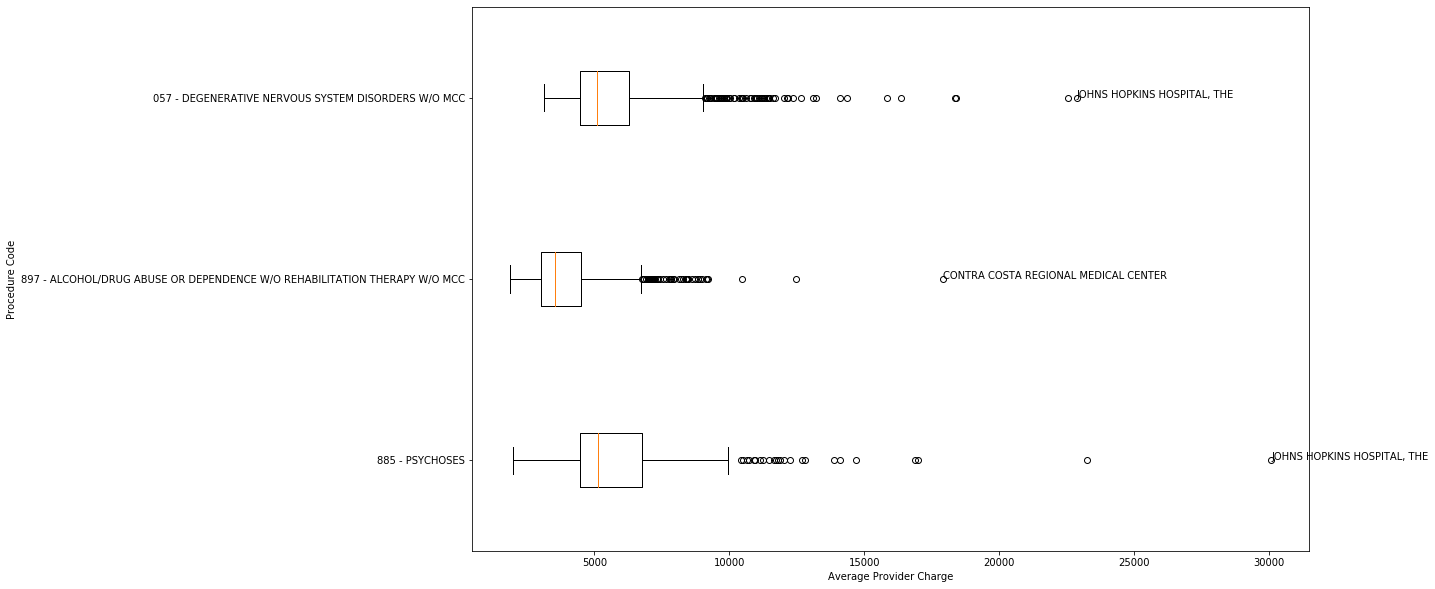

In [14]:
fig = plt.figure(1, figsize=(15, 10))


# Create an axes instance
ax = fig.add_subplot(111)


# Create the boxplot
bp = ax.boxplot(data_to_plot_forinpatient,vert=False)


ax.annotate('JOHNS HOPKINS HOSPITAL, THE', xy=(proc_in_1.max(),1))
ax.annotate('CONTRA COSTA REGIONAL MEDICAL CENTER', xy=(proc_in_2.max(),2))
ax.annotate('JOHNS HOPKINS HOSPITAL, THE', xy=(proc_in_3.max(),3))

plt.yticks([1,2,3],['885 - PSYCHOSES', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC', '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'])
plt.xlabel('Average Provider Charge')
plt.ylabel('Procedure Code')

### Outpatient summary

In [15]:
# Finding Standard deviation and mean for outpatientDRG
outpatient_cost_variation = pd.concat([medicare_provider_charge_outpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('std').add_suffix('_std'),
medicare_provider_charge_outpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('mean').add_suffix('_avg')], axis =1)

In [16]:
# Coefficient of Variance, the standard deviation divided by the mean
outpatient_cost_variation['CV'] = outpatient_cost_variation.apply(lambda x: x['Average  Estimated Submitted Charges_std']/x['Average  Estimated Submitted Charges_avg'],axis =1)

In [17]:
outpatient_cost_variation['CV'].nlargest(3)

APC
0604 - Level 1 Hospital Clinic Visits     1.385150
0698 - Level II Eye Tests & Treatments    1.310444
0019 - Level I Excision/ Biopsy           1.229897
Name: CV, dtype: float64

In [18]:
proc_1 = medicare_provider_charge_outpatient[medicare_provider_charge_outpatient['APC']=='0604 - Level 1 Hospital Clinic Visits']['Average  Estimated Submitted Charges'].values
proc_2 = medicare_provider_charge_outpatient[medicare_provider_charge_outpatient['APC']=='0698 - Level II Eye Tests & Treatments']['Average  Estimated Submitted Charges'].values
proc_3 = medicare_provider_charge_outpatient[medicare_provider_charge_outpatient['APC']=='0019 - Level I Excision/ Biopsy']['Average  Estimated Submitted Charges'].values

### combine these different collections into a list    
data_to_plot = [proc_1, proc_2, proc_3]

In [19]:
medicare_provider_charge_outpatient[medicare_provider_charge_outpatient['APC']=='0019 - Level I Excision/ Biopsy'].sort_values('Average  Estimated Submitted Charges', ascending=False)['Provider Name']


3336          CENTINELA HOSPITAL MEDICAL CENTER
3335           WHITTIER HOSPITAL MEDICAL CENTER
3521       NATCHEZ COMMUNITY HOSPITAL/SWING BED
3681                  CAROLINAS HOSPITAL SYSTEM
3717    BON SECOURS - MEMORIAL REGIONAL MEDICAL
                         ...                   
3565                   SAMARITAN MEDICAL CENTER
3585                  FORSYTH MEMORIAL HOSPITAL
3703                  HAMILTON GENERAL HOSPITAL
3591                 CALDWELL MEMORIAL HOSPITAL
3581                             MERCY HOSPITAL
Name: Provider Name, Length: 445, dtype: object

Text(0, 0.5, 'Procedure Code')

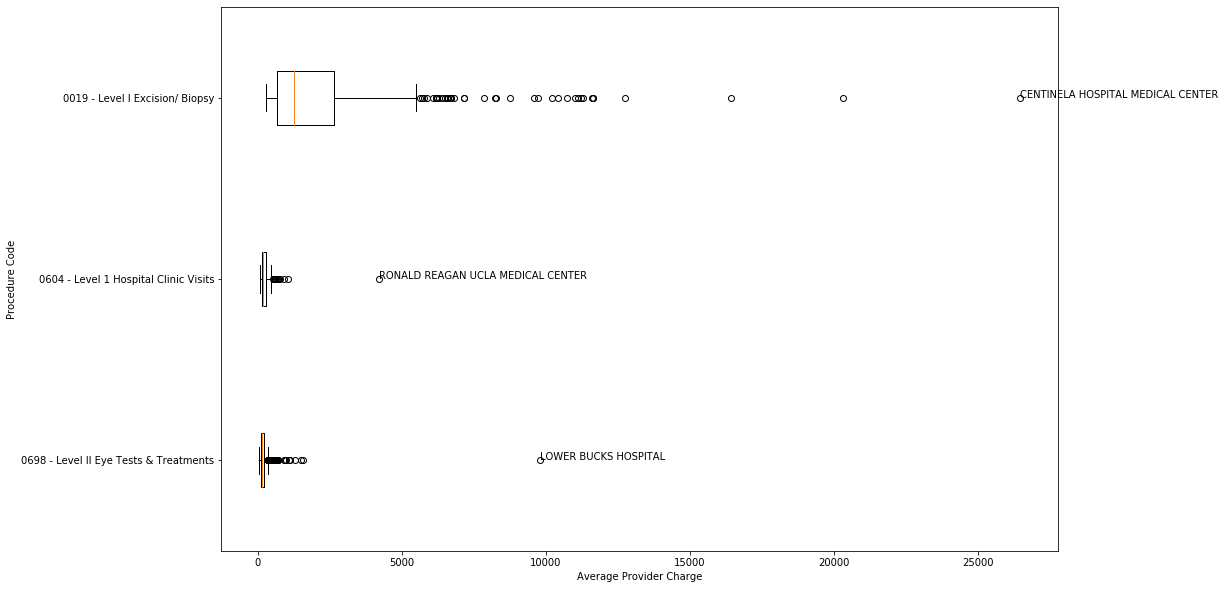

In [20]:
fig = plt.figure(1, figsize=(15, 10))


# Create an axes instance
ax = fig.add_subplot(111)


# Create the boxplot
bp = ax.boxplot(data_to_plot,vert=False)


ax.annotate('LOWER BUCKS HOSPITAL', xy=(proc_1.max(),1))
ax.annotate('RONALD REAGAN UCLA MEDICAL CENTER', xy=(proc_2.max(),2))
ax.annotate('CENTINELA HOSPITAL MEDICAL CENTER', xy=(proc_3.max(),3))

plt.yticks([1,2,3],['0698 - Level II Eye Tests & Treatments', '0604 - Level 1 Hospital Clinic Visits', '0019 - Level I Excision/ Biopsy'])
plt.xlabel('Average Provider Charge')
plt.ylabel('Procedure Code')

### Part 1B: Highest-Cost Claims by Provider

### Inpatient Analysis

In [21]:
medicare_provider_charge_inpatient.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [22]:
#Finding the max of Average Covered Charges for InpatientDRG
inpatient_cost_claims = pd.DataFrame(medicare_provider_charge_inpatient[['DRG Definition', 'Average Covered Charges']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [23]:
inpatient_cost_claims = inpatient_cost_claims.reset_index()

In [24]:
#Merging the max value with InpatientDRG dataset
inpatient_cost_claims_merge = medicare_provider_charge_inpatient.merge(inpatient_cost_claims,on='DRG Definition', how='left')

In [25]:
#function to get the max indicator
def difftyp(inpatient_cost_claims_merge):
    if ((inpatient_cost_claims_merge['Average Covered Charges_max']  == inpatient_cost_claims_merge['Average Covered Charges'])):
        return 1
    else:
        return 0

In [26]:
inpatient_cost_claims_merge['MAX'] = inpatient_cost_claims_merge.apply(difftyp, axis=1)

In [27]:
#getting number of times a provider has charge max value for procedure
inpatient_cost_claims_merge_provider = pd.DataFrame(inpatient_cost_claims_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [28]:
inpatient_cost_claims_merge_provider['MAX_sum'].nlargest(3)

Provider Name
BAYONNE HOSPITAL CENTER          23
CROZER CHESTER MEDICAL CENTER    11
STANFORD HOSPITAL                10
Name: MAX_sum, dtype: int64

In [29]:
#getting number of times a region has charge max value for procedure
inpatient_cost_claims_merge_region = pd.DataFrame(inpatient_cost_claims_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [30]:
inpatient_cost_claims_merge_region['MAX_sum'].nlargest(5)

Hospital Referral Region (HRR) Description
NJ - Newark                 25
PA - Philadelphia           23
CA - San Mateo County       13
CA - Contra Costa County     6
CA - Alameda County          5
Name: MAX_sum, dtype: int64

### Outpatient Analysis

In [31]:
medicare_provider_charge_outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [32]:
#Finding the max of Average Covered Charges for OutPatientAPC
outpatient_cost_claims = pd.DataFrame(medicare_provider_charge_outpatient[['APC', 'Average  Estimated Submitted Charges']].groupby(['APC']).agg('max').add_suffix('_max'))

In [33]:
outpatient_cost_claims = outpatient_cost_claims.reset_index()

In [34]:
#Merging the max value with OutpatientAPC dataset
outpatient_cost_claims_merge = medicare_provider_charge_outpatient.merge(outpatient_cost_claims,on='APC', how='left')

In [35]:
#function to get the max indicator
def difftyp(outpatient_cost_claims_merge):
    if ((outpatient_cost_claims_merge['Average  Estimated Submitted Charges_max']  == outpatient_cost_claims_merge['Average  Estimated Submitted Charges'])):
        return 1
    else:
        return 0

In [36]:
outpatient_cost_claims_merge['MAX'] = outpatient_cost_claims_merge.apply(difftyp, axis=1)

In [37]:
#getting number of times a provider has charge max value for procedure
outpatient_cost_claims_merge_provider = pd.DataFrame(outpatient_cost_claims_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [38]:
outpatient_cost_claims_merge_provider['MAX_sum'].nlargest(5)

Provider Name
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL    2
COLUMBIA HOSPITAL                           2
FORT WALTON BEACH MEDICAL CENTER            2
BEVERLY HOSPITAL CORPORATION                1
CENTINELA HOSPITAL MEDICAL CENTER           1
Name: MAX_sum, dtype: int64

In [39]:
#getting number of times a region has charge max value for procedure
outpatient_cost_claims_merge_region= pd.DataFrame(outpatient_cost_claims_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [40]:
outpatient_cost_claims_merge_region['MAX_sum'].nlargest(3)

Hospital Referral Region (HRR) Description
PA - Philadelphia     5
CA - Los Angeles      3
CA - Orange County    2
Name: MAX_sum, dtype: int64

The cost claims of InPatientsDRG overtakes the cost claims of OutpatientsAPC.

The 3 Highest cost claims can be seen for follwing Providers-

BAYONNE HOSPITAL CENTER       - NJ - Newark

CROZER CHESTER MEDICAL CENTER - PA - Philadelphia

STANFORD HOSPITAL             - CA - San Mateo County

### Part 1C: Highest-Cost Claims by Region

### For InpatientDRG

In [41]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Region
medicare_inpatient_avg = pd.DataFrame(medicare_provider_charge_inpatient[['DRG Definition', 'Hospital Referral Region (HRR) Description',  'Average Covered Charges']].groupby(['DRG Definition', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg'))

In [42]:
medicare_inpatient_avg = medicare_inpatient_avg.reset_index()

In [43]:
medicare_inpatient_avg.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118


In [44]:
#Finding the max for InpatientDRG DRG Definition
medicare_inpatient_max = pd.DataFrame(medicare_inpatient_avg[['DRG Definition', 'Average Covered Charges_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [45]:
medicare_inpatient_max = medicare_inpatient_max.reset_index()

In [46]:
medicare_inpatient_max.head()

,DRG Definition,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,105929.470600
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.437500
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,145720.057518
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,73820.938782
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,65418.983067


In [47]:
#Merging The mean and max - will give side by side comparison of region having highest claims
medicare_inpatient_merge = medicare_inpatient_avg.merge(medicare_inpatient_max,on='DRG Definition', how='left')

In [48]:
medicare_inpatient_merge.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430,105929.4706
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538,105929.4706
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905,105929.4706
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554,105929.4706
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118,105929.4706


In [49]:
#function to get the max indicator
def difftyp(medicare_inpatient_merge):
    if ((medicare_inpatient_merge['Average Covered Charges_avg'] == medicare_inpatient_merge['Average Covered Charges_avg_max'])):
        return 1
    elif ((medicare_inpatient_merge['Average Covered Charges_avg'] > medicare_inpatient_merge['Average Covered Charges_avg_max'])):
        return 1
    else:
        return 0

In [50]:
medicare_inpatient_merge['MAX'] = medicare_inpatient_merge.apply(difftyp, axis=1)

In [51]:
medicare_inpatient_merge[medicare_inpatient_merge['MAX'] == 1].head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max,MAX
22,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Napa,105929.470600,105929.470600,1
330,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA - San Mateo County,148128.437500,148128.437500,1
588,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,145720.057518,145720.057518,1
907,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - San Mateo County,73820.938782,73820.938782,1
1198,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,65418.983067,65418.983067,1


In [52]:
#getting number of times a region has charge max value for procedure
medicare_inpatient_merge_group = pd.DataFrame(medicare_inpatient_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [53]:
medicare_inpatient_merge_group = medicare_inpatient_merge_group.reset_index()

In [54]:
medicare_inpatient_merge_group.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


### For OutpatientAPC

In [55]:
medicare_provider_charge_outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [56]:
#Finding the mean of Average Covered Charges for Outpatient by APC and Region
medicare_outpatient_avg = pd.DataFrame(medicare_provider_charge_outpatient[['APC', 'Hospital Referral Region (HRR) Description', 'Average  Estimated Submitted Charges']].groupby(['APC', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg'))

In [57]:
medicare_outpatient_avg = medicare_outpatient_avg.reset_index()

In [58]:
medicare_outpatient_avg.head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863


In [59]:

#Finding the max for Outpatient
medicare_outpatient_max = pd.DataFrame(medicare_outpatient_avg[['APC', 'Average  Estimated Submitted Charges_avg']].groupby(['APC']).agg('max').add_suffix('_max'))

In [60]:
medicare_outpatient_max = medicare_outpatient_max.reset_index()

In [61]:
medicare_outpatient_max.head()

,APC,Average Estimated Submitted Charges_avg_max
0,0012 - Level I Debridement & Destruction,438.307045
1,0013 - Level II Debridement & Destruction,1042.707451
2,0015 - Level III Debridement & Destruction,1478.536545
3,0019 - Level I Excision/ Biopsy,15946.325655
4,0020 - Level II Excision/ Biopsy,15784.975000


In [62]:
#Merging The mean and max - will give side by side comparison of region having highest claims
medicare_outpatient_merge = medicare_outpatient_avg.merge(medicare_outpatient_max,on='APC', how='left')

In [63]:
medicare_outpatient_merge.columns

Index(['APC', 'Hospital Referral Region (HRR) Description',
       'Average  Estimated Submitted Charges_avg',
       'Average  Estimated Submitted Charges_avg_max'],
      dtype='object')

In [64]:
#function to get the max indicator
def difftyp(medicare_outpatient_merge):
    if ((medicare_outpatient_merge['Average  Estimated Submitted Charges_avg'] == medicare_outpatient_merge['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    elif ((medicare_outpatient_merge['Average  Estimated Submitted Charges_avg'] > medicare_outpatient_merge['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    else:
        return 0

In [65]:
medicare_outpatient_merge['MAX'] = medicare_outpatient_merge.apply(difftyp, axis=1)

In [66]:
medicare_outpatient_merge[medicare_outpatient_merge['MAX'] == 1].head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg,Average Estimated Submitted Charges_avg_max,MAX
93,0012 - Level I Debridement & Destruction,NE - Omaha,438.307045,438.307045,1
160,0013 - Level II Debridement & Destruction,AL - Dothan,1042.707451,1042.707451,1
582,0015 - Level III Debridement & Destruction,MI - Dearborn,1478.536545,1478.536545,1
756,0019 - Level I Excision/ Biopsy,CA - Los Angeles,15946.325655,15946.325655,1
1013,0020 - Level II Excision/ Biopsy,IL - Aurora,15784.975000,15784.975000,1


In [67]:
#getting number of times a region has charge max value for procedure
medicare_outpatient_merge_group = pd.DataFrame(medicare_outpatient_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [68]:
medicare_outpatient_merge_group = medicare_outpatient_merge_group.reset_index()

In [69]:
medicare_outpatient_merge_group.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,1
3,AL - Huntsville,1
4,AL - Mobile,0


In [70]:
combination_df = [medicare_inpatient_merge_group, medicare_outpatient_merge_group]
medicare_region = pd.concat(combination_df)

In [71]:
medicare_region.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


In [72]:
#getting the total sum of occurance
medicare_region_group = pd.DataFrame(medicare_region[['Hospital Referral Region (HRR) Description','MAX_sum']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_agg'),)

In [73]:
medicare_region_group['MAX_sum_agg'].nlargest(3)

Hospital Referral Region (HRR) Description
CA - Contra Costa County    36
CA - San Mateo County       24
CA - Santa Cruz             11
Name: MAX_sum_agg, dtype: int64

### Part1D: Highest number of procedures and Largest Differences between claims and Reimbursements

### For InpatientDRG

Considering -
Average Covered Charges as Claims

Average Total Payments as Reimbursement

In [74]:
medicare_provider_charge_inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [75]:
Medicare_IN_DRG = medicare_provider_charge_inpatient[['DRG Definition', 'Provider Name','Average Total Payments', 'Average Covered Charges' ]]

In [76]:
#Difference of claim and reimbursement
Medicare_IN_DRG['Claim_Diff'] = Medicare_IN_DRG.apply(lambda x: x['Average Covered Charges'] - x['Average Total Payments'],axis =1)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
Medicare_IN_DRG.head()

,DRG Definition,Provider Name,Average Total Payments,Average Covered Charges,Claim_Diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,5777.241758,32963.07692,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,5787.571429,15131.85714,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,5434.958333,37560.37500,32125.416667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,5417.560000,13998.28000,8580.720000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,5658.333333,31633.27778,25974.944447


In [78]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Provider
Medicare_IN_AGG = pd.DataFrame(Medicare_IN_DRG[['DRG Definition', 'Provider Name', 'Claim_Diff']].groupby(['DRG Definition', 'Provider Name']).agg('mean').add_suffix('_avg'))

In [79]:
Medicare_IN_AGG = Medicare_IN_AGG.reset_index()
Medicare_IN_AGG.head()

,DRG Definition,Provider Name,Claim_Diff_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141


In [80]:
#Finding the max for InpatientDRG DRG Definition
Medicare_IN_MAX = pd.DataFrame(Medicare_IN_AGG[['DRG Definition', 'Claim_Diff_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [81]:
Medicare_IN_MAX = Medicare_IN_MAX.reset_index()
Medicare_IN_MAX.head()

,DRG Definition,Claim_Diff_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,135377.61538
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,122609.00000
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,214346.92103
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,144842.08333
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,109535.14290


In [82]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Medicare_IN_MERGE = Medicare_IN_AGG.merge(Medicare_IN_MAX,on='DRG Definition', how='left')

In [83]:
Medicare_IN_MERGE = Medicare_IN_MERGE.reset_index()
Medicare_IN_MERGE.head()

,index,DRG Definition,Provider Name,Claim_Diff_avg,Claim_Diff_avg_max
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.61538
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.61538
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.61538


In [84]:
#function to get the max indicator
def difftyp(Medicare_IN_MERGE):
    if ((Medicare_IN_MERGE['Claim_Diff_avg'] == Medicare_IN_MERGE['Claim_Diff_avg_max'])):
        return 1
    elif ((Medicare_IN_MERGE['Claim_Diff_avg'] > Medicare_IN_MERGE['Claim_Diff_avg_max'])):
        return 1
    else:
        return 0

In [85]:
Medicare_IN_MERGE['MAX'] = Medicare_IN_MERGE.apply(difftyp, axis=1)

In [86]:
Medicare_IN_MERGE[Medicare_IN_MERGE['MAX'] == 1].head()

,index,DRG Definition,Provider Name,Claim_Diff_avg,Claim_Diff_avg_max,MAX
980,980,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,135377.61538,135377.61538,1
2048,2048,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,STANFORD HOSPITAL,122609.00000,122609.00000,1
2533,2533,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,DOCTORS MEDICAL CENTER,214346.92103,214346.92103,1
3953,3953,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,BAYONNE HOSPITAL CENTER,144842.08333,144842.08333,1
6514,6514,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HAHNEMANN UNIVERSITY HOSPITAL,109535.14290,109535.14290,1


In [87]:
#getting number of times a provider has max claim diff for max procudures
Medicare_IN_MERGE_GROUPED = pd.DataFrame(Medicare_IN_MERGE[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [88]:
Medicare_IN_MERGE_GROUPED['MAX_sum'].nlargest(3)

Provider Name
BAYONNE HOSPITAL CENTER          29
CROZER CHESTER MEDICAL CENTER    12
HAHNEMANN UNIVERSITY HOSPITAL     8
Name: MAX_sum, dtype: int64

### Outpatients APC

Considering Average Estimated Submitted Charge as Claims

Average Total Payments as Reimbursement

In [89]:
medicare_provider_charge_outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [90]:
Medicare_Out_DRG = medicare_provider_charge_outpatient[['APC', 'Provider Name', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [91]:
#Difference of claim and reimbursement
Medicare_Out_DRG['Claim_Diff'] = Medicare_Out_DRG.apply(lambda x: x['Average  Estimated Submitted Charges'] - x['Average Total Payments'],axis =1)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
Medicare_Out_DRG.head()

,APC,Provider Name,Average Estimated Submitted Charges,Average Total Payments,Claim_Diff
0,0012 - Level I Debridement & Destruction,EAST ALABAMA MEDICAL CENTER AND SNF,78.086957,21.910435,56.176522
1,0012 - Level I Debridement & Destruction,CENTRAL PENINSULA GENERAL HOSPITAL,149.589749,36.623853,112.965895
2,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",50.135411,14.541841,35.593569
3,0012 - Level I Debridement & Destruction,BANNER BAYWOOD MEDICAL CENTER,112.400000,23.736000,88.664000
4,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",152.045455,16.569091,135.476364


In [93]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Provider
Medicare_Out_AGG = pd.DataFrame(Medicare_Out_DRG[['APC', 'Provider Name', 'Claim_Diff']].groupby(['APC', 'Provider Name']).agg('mean').add_suffix('_avg'))

In [94]:
Medicare_Out_AGG = Medicare_Out_AGG.reset_index()
Medicare_Out_AGG.head()

,APC,Provider Name,Claim_Diff_avg
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715


In [95]:
#Finding the max for InpatientDRG DRG Definition
Medicare_Out_MAX = pd.DataFrame(Medicare_Out_AGG[['APC', 'Claim_Diff_avg']].groupby(['APC']).agg('max').add_suffix('_max'))

In [96]:
Medicare_Out_MAX = Medicare_Out_MAX.reset_index()
Medicare_Out_MAX.head()

,APC,Claim_Diff_avg_max
0,0012 - Level I Debridement & Destruction,827.44000
1,0013 - Level II Debridement & Destruction,5175.40000
2,0015 - Level III Debridement & Destruction,2980.73963
3,0019 - Level I Excision/ Biopsy,26073.80500
4,0020 - Level II Excision/ Biopsy,18362.75882


In [97]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Medicare_Out_MERGE = Medicare_Out_AGG.merge(Medicare_Out_MAX,on='APC', how='left')

In [98]:
Medicare_Out_MERGE = Medicare_Out_MERGE.reset_index()
Medicare_Out_MERGE.head()

,index,APC,Provider Name,Claim_Diff_avg,Claim_Diff_avg_max
0,0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44
1,1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44
2,2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846,827.44
3,3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013,827.44
4,4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715,827.44


In [99]:
#function to get the max indicator
def difftyp(Medicare_Out_MERGE):
    if ((Medicare_Out_MERGE['Claim_Diff_avg'] == Medicare_Out_MERGE['Claim_Diff_avg_max'])):
        return 1
    elif ((Medicare_Out_MERGE['Claim_Diff_avg'] > Medicare_Out_MERGE['Claim_Diff_avg_max'])):
        return 1
    else:
        return 0

In [100]:
Medicare_Out_MERGE['MAX'] = Medicare_Out_MERGE.apply(difftyp, axis=1)

In [101]:
Medicare_Out_MERGE[Medicare_Out_MERGE['MAX'] == 1].head()

,index,APC,Provider Name,Claim_Diff_avg,Claim_Diff_avg_max,MAX
152,152,0012 - Level I Debridement & Destruction,NEBRASKA ORTHOPAEDIC HOSPITAL,827.44000,827.44000,1
1265,1265,0013 - Level II Debridement & Destruction,RUSSELLVILLE HOSPITAL,5175.40000,5175.40000,1
2703,2703,0015 - Level III Debridement & Destruction,RESEARCH MEDICAL CENTER,2980.73963,2980.73963,1
3247,3247,0019 - Level I Excision/ Biopsy,CENTINELA HOSPITAL MEDICAL CENTER,26073.80500,26073.80500,1
4255,4255,0020 - Level II Excision/ Biopsy,ORANGE COAST MEMORIAL MEDICAL CENTER,18362.75882,18362.75882,1


In [102]:
#getting number of times a provider has max claim diff for max procudures
Medicare_Out_MERGE_GROUPED = pd.DataFrame(Medicare_Out_MERGE[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'))

In [103]:
Medicare_Out_MERGE_GROUPED['MAX_sum'].nlargest(3)

Provider Name
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL    2
COLUMBIA HOSPITAL                           2
FORT WALTON BEACH MEDICAL CENTER            2
Name: MAX_sum, dtype: int64

### Part 2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.

### Part 2A: Providers Least Like Others

In [104]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [105]:
pandas_profiling.ProfileReport(medicare_provider_charge_inpatient)

C:\Users\nanda\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,163065
Total Missing (%),0.0%
Total size in memory,14.9 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [106]:
pandas_profiling.ProfileReport(medicare_provider_charge_outpatient)

C:\Users\nanda\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,43372
Total Missing (%),0.0%
Total size in memory,3.6 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Columns to be used to process inpatient data:
'DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
    'Total Discharges', 'Average Covered Charges' and 'Average Total Payments'

#### Columns to be used to process outpatient data:
'APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
    'Outpatient Services', 'Average  Estimated Submitted Charges' and 'Average Total Payments' 

In [107]:
medicare_in_data = medicare_provider_charge_inpatient[['DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description', 'Total Discharges', 'Average Covered Charges', 'Average Total Payments']]

In [108]:
medicare_in_data.rename(columns={'DRG Definition' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Total Discharges' : 'Count Of Services', 'Average Covered Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

C:\Users\nanda\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [109]:
medicare_out_data = medicare_provider_charge_outpatient[['APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                                 'Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [110]:
medicare_out_data.rename(columns={'APC' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Outpatient Services' : 'Count Of Services', 'Average  Estimated Submitted Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

In [111]:
frames = [medicare_in_data,medicare_out_data]
medicare_data = pd.concat(frames)

In [112]:
medicare_data.head()

,Procedures,Provider Name,Provider State,Region,Count Of Services,Charges,Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [113]:
medicare_data.isnull().any()

Procedures           False
Provider Name        False
Provider State       False
Region               False
Count Of Services    False
Charges              False
Payment              False
dtype: bool

In [114]:
medicare_data['Charges'] = medicare_data['Charges'].round(2)

In [115]:
medicare_data['Payment'] = medicare_data['Payment'].round(2)

In [116]:
medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count Of Services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


### Grouping data by Provider:

In [117]:
medicare_data_group_provider = medicare_data.groupby(['Provider Name']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Region': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [118]:
medicare_data_group_provider = medicare_data_group_provider.reset_index()

In [119]:
medicare_data_group_provider.head()

,Provider Name,Procedures,Provider State,Region,Count Of Services,Charges,Payment
0,ABBEVILLE GENERAL HOSPITAL,25,1,1,1294,314058.89,121115.80
1,ABBOTT NORTHWESTERN HOSPITAL,121,1,1,20810,4495571.85,1065438.89
2,ABILENE REGIONAL MEDICAL CENTER,71,1,1,7285,3613719.38,516580.33
3,ABINGTON MEMORIAL HOSPITAL,121,1,1,19300,6832266.25,1027582.36
4,ACMH HOSPITAL,54,1,1,4151,406719.05,199332.50


### Grouping data by Region:

In [120]:
medicare_data_group_region = medicare_data.groupby(['Region']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Provider Name': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [121]:
medicare_data_group_region = medicare_data_group_region.reset_index()

In [122]:
medicare_data_group_region.head()

,Region,Procedures,Provider State,Provider Name,Count Of Services,Charges,Payment
0,AK - Anchorage,100,1,9,31406,9427445.52,3390445.95
1,AL - Birmingham,127,2,40,166237,68364063.11,14648212.20
2,AL - Dothan,122,3,10,43700,9561883.16,2419670.08
3,AL - Huntsville,125,2,8,71691,11754072.47,3090569.68
4,AL - Mobile,125,2,14,70394,16193817.95,4256181.67


Creating the cluster at Provider level to identify the providers with least similarity

### Part 2A: Providers Least Like Others

In [123]:
medicare_data_group_provider_num = medicare_data_group_provider.select_dtypes(include =['int64', 'float64']).copy()

In [124]:
col_list_prov = medicare_data_group_provider_num.columns

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
medicare_provider_scaled=sc.fit_transform(medicare_data_group_provider_num)

In [126]:
from sklearn.decomposition import PCA
var_ratio={}
pc = PCA(n_components=3)
medicare_provider_pca=pc.fit(medicare_provider_scaled)
var_ratio[5]=sum(medicare_provider_pca.explained_variance_ratio_)

In [127]:
reduced_cr=pc.fit_transform(medicare_provider_scaled)

In [128]:
var_ratio

{5: 0.9459627950199212}

In [129]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(3)], index=col_list_prov)

,PC_0,PC_1,PC_2
Procedures,0.428081,-0.397857,-0.197239
Provider State,0.356879,0.591702,0.086489
Region,0.361007,0.589502,0.074693
Count Of Services,0.289998,-0.288352,0.896801
Charges,0.464627,-0.172105,-0.354212
Payment,0.509000,-0.176972,-0.135345


In [130]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(3)])

PC_0    0.564617
PC_1    0.261370
PC_2    0.119976
dtype: float64

In [131]:
from sklearn import metrics
#metrics.silhouette_score(credit_scaled, km_4.labels_)

In [132]:
# calculate SC for K=3 through K=25
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(medicare_provider_scaled)
    scores.append(metrics.silhouette_score(medicare_provider_scaled, km.labels_))

In [133]:
scores

[0.5201153893322814,
 0.5355898254291706,
 0.551578706076644,
 0.45134182593397054,
 0.4279168677473559,
 0.43153251726195474,
 0.43232176057687366,
 0.42238581130678515,
 0.3985213069269066,
 0.3954478378480221,
 0.39481670559567833,
 0.3523327345434022,
 0.3723885802218395,
 0.3680345522683115,
 0.34135362937462443,
 0.3436943759300252,
 0.33615808254379664,
 0.33581531400502035,
 0.3473282358605687,
 0.33637786085678045,
 0.3370079419938019,
 0.3297092401586452]

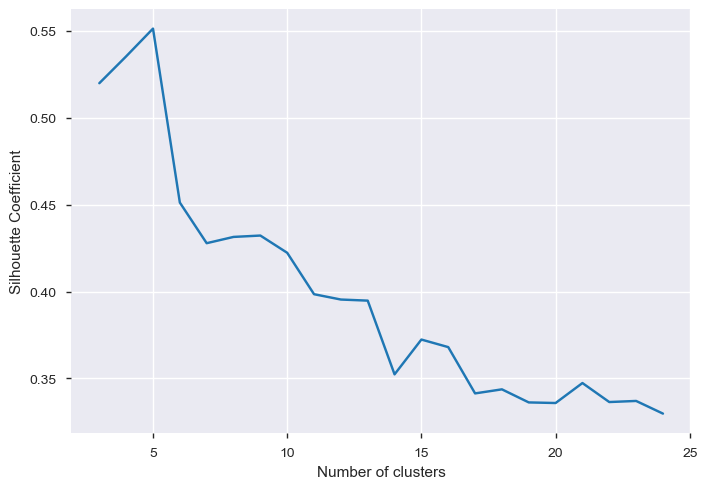

In [134]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### We will use 22 clusters as it is having lowest SC

In [135]:
from sklearn.cluster import KMeans
km_22=KMeans(n_clusters=22,random_state=123)

In [136]:
km_22.fit(reduced_cr)
km_22.labels_

array([ 8, 18, 21, ...,  3,  1,  3])

In [137]:
pd.Series(km_22.labels_).value_counts()

8     549
3     493
20    407
1     370
0     344
21    307
18    214
9     130
13    121
14     91
19     35
16     32
4      31
12     22
6      22
15     12
10      6
2       5
17      4
5       3
11      2
7       1
dtype: int64

Text(0.5, 0, 'PC_22')

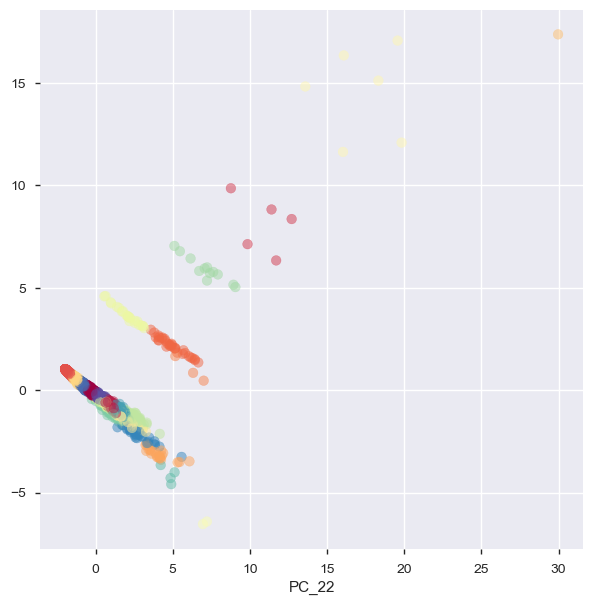

In [138]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_22.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_22')

In [297]:
cluster_df_22=pd.concat([medicare_data_group_provider, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [298]:
cluster_df_22.to_excel('Part2_cluster_provider.xlsx')

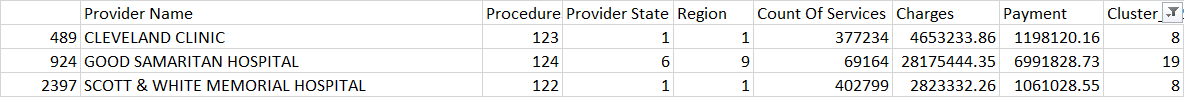

From above scatter plot and value counts we conclude that cluster no. 19 and 8 are outliers with least similarity

### Part 2B: Regions Least Like Others

#### Creating the cluster at Region level to identify the region with least similarity

In [141]:
medicare_data_group_region.head()

,Region,Procedures,Provider State,Provider Name,Count Of Services,Charges,Payment
0,AK - Anchorage,100,1,9,31406,9427445.52,3390445.95
1,AL - Birmingham,127,2,40,166237,68364063.11,14648212.20
2,AL - Dothan,122,3,10,43700,9561883.16,2419670.08
3,AL - Huntsville,125,2,8,71691,11754072.47,3090569.68
4,AL - Mobile,125,2,14,70394,16193817.95,4256181.67


Step 1: Creating data for fitting into cluster analysis

In [142]:
medicare_data_group_region_num = medicare_data_group_region.select_dtypes(include =['int64', 'float64']).copy()

In [143]:
col_list_region = medicare_data_group_region_num.columns

Step 2: Standardizing the Data

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
medicare_region_scaled=sc.fit_transform(medicare_data_group_region_num)

Step 3: Applying PCA

In [145]:
from sklearn.decomposition import PCA
var_ratio={}
pc = PCA(n_components=4)
medicare_region_pca=pc.fit(medicare_region_scaled)
var_ratio[4]=sum(medicare_region_pca.explained_variance_ratio_)

In [146]:
reduced_cr_region=pc.fit_transform(medicare_region_scaled)

In [147]:
var_ratio

{4: 0.9665519044327816}

In [148]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(4)], index=col_list_region)

,PC_0,PC_1,PC_2,PC_3
Procedures,0.317197,0.294480,-0.859202,-0.271965
Provider State,0.117119,0.919499,0.334287,0.079286
Provider Name,0.486000,0.004980,0.219587,-0.151846
Count Of Services,0.424189,-0.090060,-0.149066,0.852557
Charges,0.467551,-0.192563,0.227669,-0.410366
Payment,0.500932,-0.150287,0.166591,-0.037931


In [149]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(4)])

PC_0    0.607834
PC_1    0.170807
PC_2    0.115609
PC_3    0.072302
dtype: float64

Step 4: Clustering

In [150]:
from sklearn import metrics

In [151]:
# calculate SC for K=3 through K=25
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(medicare_region_scaled)
    scores.append(metrics.silhouette_score(medicare_region_scaled, km.labels_))

In [152]:
scores

[0.31469461595992654,
 0.3872393086154885,
 0.4059540045327712,
 0.41483003587168793,
 0.3503475965234703,
 0.32359618448377947,
 0.3643379458450474,
 0.34286837372246376,
 0.33639785221077695,
 0.3017628871322462,
 0.3429334076683828,
 0.3149440058108327,
 0.31798452295354124,
 0.3201396256347682,
 0.3170432738876082,
 0.3001642168775211,
 0.28537246613936185,
 0.29339403322256247,
 0.30717906314136395,
 0.2951996211190438,
 0.3227931042783878,
 0.3142270655006412]

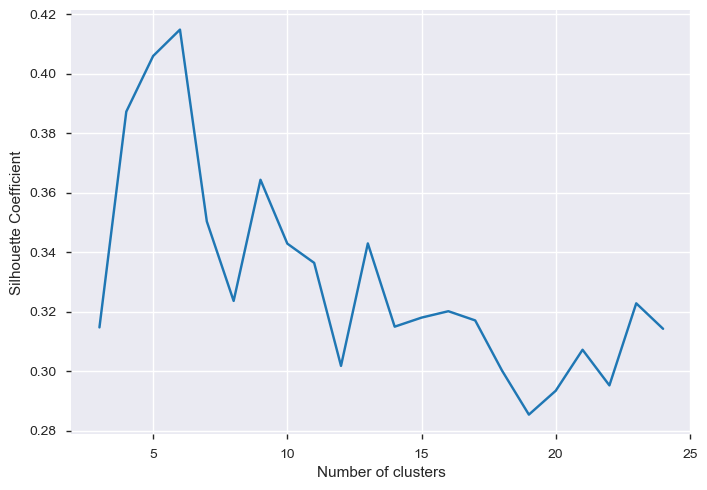

In [153]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

As we can observe in above plot we have lowest SC at 22. So, we will be using it for further analysis.

In [154]:
from sklearn.cluster import KMeans

km_22=KMeans(n_clusters=22,random_state=123)
km_22.fit(reduced_cr_region)
km_22.labels_
pd.Series(km_22.labels_).value_counts()

12    59
6     42
2     29
0     27
13    19
20    18
15    18
4     15
17    12
3     10
16     9
21     8
10     8
8      6
1      6
18     5
7      4
11     4
14     4
9      1
5      1
19     1
dtype: int64

Text(0.5, 0, 'PC_22')

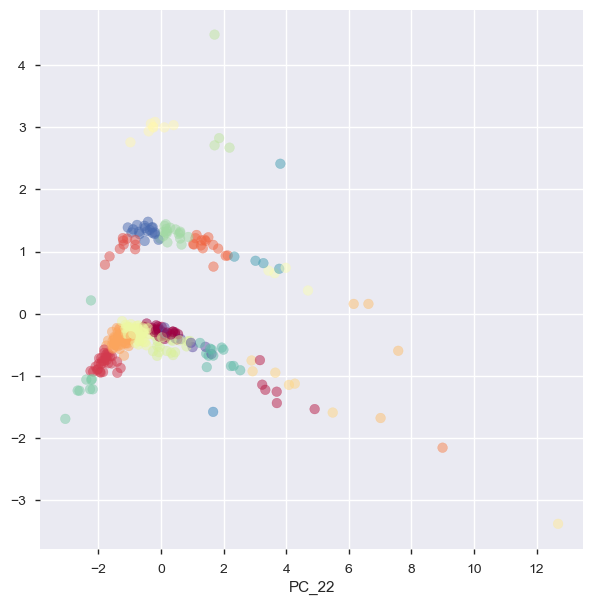

In [155]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr_region[:,0], reduced_cr_region[:,1], c=km_22.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_22')

In [156]:
cluster_df_22_region=pd.concat([medicare_data_group_region, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [296]:
cluster_df_22_region.to_excel('Part2_cluster_region.xlsx')

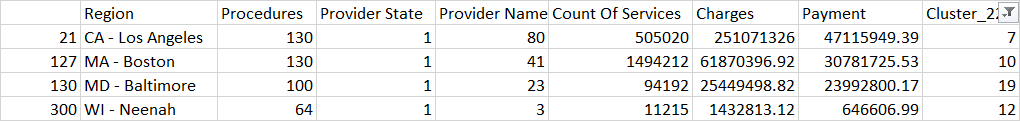

From above scatter plot and value counts we conclude that cluster no. 7,10,12 and 19 are outliers with least similarity

### Part 3: Identify 10,000 Medicare patients who are involved in anomalous activities

#### Importing the relevant datasets

In [158]:
Patient_history = pd.read_csv('Patient_history_samp.csv')
Review_patient = pd.read_csv('Review_patient_history_samp.csv')
Review_transaction = pd.read_csv('Rreview_transaction_coo.csv')
Transaction = pd.read_csv('Transaction_coo.csv')

#### Data Analysis and Data Preparation

Sets of medical procedures that were frequent within the flagged patient group but infrequent in the general population were assumed to be evidence of anomalous behavior.

Review_patient_history_samp.csv and Rreview_transaction_coo.csv datasets are the details for reviewed patient.
Patient_history_samp.csv and Transaction_coo.csv are unclassified patient.

We have to identify the cause/pattern for the review patient and based on that the unmarked patients needs to be marked.

In [159]:
Patient_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [160]:
Review_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
id        5000 non-null int64
age       4974 non-null object
gender    5000 non-null object
income    4974 non-null object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [161]:
Patient_history.groupby('gender')['id'].nunique()

gender
F    274512
M    225488
Name: id, dtype: int64

In [162]:
Patient_history.groupby('income')['id'].nunique()

income
16000-23999    102492
24000-31999     75670
32000-47999     95899
48000+         115865
<16000         107543
Name: id, dtype: int64

In [163]:
Patient_history.groupby('age')['id'].nunique()

age
65-74    219329
75-84    128992
85+       64581
<65       84568
Name: id, dtype: int64

In [164]:
#Converting categorical categories into numerical for better analsysis.
#Function to get the income group indicator
def incomecat(patient):
    if (patient['income']  == '16000-23999'):
        return 2
    elif (patient['income']  == '24000-31999'):
        return 3
    elif (patient['income']  == '32000-47999'):
        return 4
    elif (patient['income']  == '48000+'):
        return 5
    else:
        return 1

In [165]:
#function to get the age group indicator
def agecat(patient):
    if (patient['age']  == '65-74'):
        return 2
    elif (patient['age']  == '75-84'):
        return 3
    elif (patient['age']  == '85+'):
        return 4
    else:
        return 1

In [166]:
#function to get the gender group indicator
def gendercat(patient):
    if (patient['gender']  == 'M'):
        return 1
    else:
        return 0

In [167]:
Patient_history.isnull().any()

id        False
age        True
gender    False
income     True
dtype: bool

#### Applying the functions on review and unmarked datasets

In [168]:
Patient_history['income_group'] = Patient_history.apply(incomecat, axis=1)

In [169]:
Patient_history['age_group'] = Patient_history.apply(agecat, axis=1)

In [170]:
Patient_history['gender_group'] = Patient_history.apply(gendercat, axis=1)

In [171]:
Review_patient['income_group'] = Review_patient.apply(incomecat, axis=1)

In [172]:
Review_patient['age_group'] = Review_patient.apply(agecat, axis=1)

In [173]:
Review_patient['gender_group'] = Review_patient.apply(gendercat, axis=1)

In [174]:
Patient_history.drop(['age', 'gender', 'income'], axis =1 , inplace = True)

In [175]:
Review_patient.drop(['age', 'gender', 'income'], axis =1 , inplace = True)

Create dummies to count and sum the number of procedure used by patients.

Grouping them at patient level - so that there are 1 row per patient for the transaction dataset.

In [176]:
#Creating dummies for transaction dataset
col_dummies=pd.get_dummies(Transaction['global_proc_id'], prefix='proc')
Transaction_cat = pd.concat([Transaction, col_dummies], axis=1)
Transaction_cat.drop( 'global_proc_id', axis = 1, inplace = True )

In [177]:
Transaction_cat.columns

Index(['id', 'count', 'proc_1', 'proc_2', 'proc_3', 'proc_4', 'proc_5',
       'proc_6', 'proc_7', 'proc_8',
       ...
       'proc_121', 'proc_122', 'proc_123', 'proc_124', 'proc_125', 'proc_126',
       'proc_127', 'proc_128', 'proc_129', 'proc_130'],
      dtype='object', length=132)

In [178]:
Transaction_grouped = pd.DataFrame(Transaction_cat[['id', 'count','proc_1' ,'proc_2' ,'proc_3' ,'proc_4' ,'proc_5' ,
                                                    'proc_6' ,'proc_7' ,'proc_8' ,'proc_9' ,'proc_10' ,'proc_11' ,
                                                    'proc_12' ,'proc_13' ,'proc_14' ,'proc_15' ,'proc_16' ,'proc_17' ,
                                                    'proc_18' ,'proc_19' ,'proc_20' ,'proc_21' ,'proc_22' ,'proc_23' ,
                                                    'proc_24' ,'proc_25' ,'proc_26' ,'proc_27' ,'proc_28' ,'proc_29' ,
                                                    'proc_30' ,'proc_31' ,'proc_32' ,'proc_33' ,'proc_34' ,'proc_35' ,
                                                    'proc_36' ,'proc_37' ,'proc_38' ,'proc_39' ,'proc_40' ,'proc_41' ,
                                                    'proc_42' ,'proc_43' ,'proc_44' ,'proc_45' ,'proc_46' ,'proc_47' ,
                                                    'proc_48' ,'proc_49' ,'proc_50' ,'proc_51' ,'proc_52' ,'proc_53' ,
                                                    'proc_54' ,'proc_55' ,'proc_56' ,'proc_57' ,'proc_58' ,'proc_59' ,
                                                    'proc_60' ,'proc_61' ,'proc_62' ,'proc_63' ,'proc_64' ,'proc_65' ,
                                                    'proc_66' ,'proc_67' ,'proc_68' ,'proc_69' ,'proc_70' ,'proc_71' ,
                                                    'proc_72' ,'proc_73' ,'proc_74' ,'proc_75' ,'proc_76' ,'proc_77' ,
                                                    'proc_78' ,'proc_79' ,'proc_80' ,'proc_81' ,'proc_82' ,'proc_83' ,
                                                    'proc_84' ,'proc_85' ,'proc_86' ,'proc_87' ,'proc_88' ,'proc_89' ,
                                                    'proc_90' ,'proc_91' ,'proc_92' ,'proc_93' ,'proc_94' ,'proc_95' ,
                                                    'proc_96' ,'proc_97' ,'proc_98' ,'proc_99' ,'proc_100' ,'proc_101' ,
                                                    'proc_102' ,'proc_103' ,'proc_104' ,'proc_105' ,'proc_106' ,
                                                    'proc_107' ,'proc_108' ,'proc_109' ,'proc_110' ,'proc_111' ,
                                                    'proc_112' ,'proc_113' ,'proc_114' ,'proc_115' ,'proc_116' ,
                                                    'proc_117' ,'proc_118' ,'proc_119' ,'proc_120' ,'proc_121' ,
                                                    'proc_122' ,'proc_123' ,'proc_124' ,'proc_125' ,'proc_126' ,
                                                    'proc_127' ,'proc_128' ,'proc_129' ,'proc_130']].groupby(['id']).agg({'count':'sum',
                                                                                         'proc_1' :'sum' ,
                                                                                         'proc_2' :'sum' ,
                                                                                         'proc_3' :'sum' ,
                                                                                         'proc_4' :'sum' ,
                                                                                         'proc_5' :'sum' ,
                                                                                         'proc_6' :'sum' ,
                                                                                         'proc_7' :'sum' ,
                                                                                         'proc_8' :'sum' ,
                                                                                         'proc_9' :'sum' ,
                                                                                         'proc_10' :'sum' ,
                                                                                         'proc_11' :'sum' ,
                                                                                         'proc_12' :'sum' ,
                                                                                         'proc_13' :'sum' ,
                                                                                         'proc_14' :'sum' ,
                                                                                         'proc_15' :'sum' ,
                                                                                         'proc_16' :'sum' ,
                                                                                         'proc_17' :'sum' ,
                                                                                         'proc_18' :'sum' ,
                                                                                         'proc_19' :'sum' ,
                                                                                         'proc_20' :'sum' ,
                                                                                         'proc_21' :'sum' ,
                                                                                         'proc_22' :'sum' ,
                                                                                         'proc_23' :'sum' ,
                                                                                         'proc_24' :'sum' ,
                                                                                         'proc_25' :'sum' ,
                                                                                         'proc_26' :'sum' ,
                                                                                         'proc_27' :'sum' ,
                                                                                         'proc_28' :'sum' ,
                                                                                         'proc_29' :'sum' ,
                                                                                         'proc_30' :'sum' ,
                                                                                         'proc_31' :'sum' ,
                                                                                         'proc_32' :'sum' ,
                                                                                         'proc_33' :'sum' ,
                                                                                         'proc_34' :'sum' ,
                                                                                         'proc_35' :'sum' ,
                                                                                         'proc_36' :'sum' ,
                                                                                         'proc_37' :'sum' ,
                                                                                         'proc_38' :'sum' ,
                                                                                         'proc_39' :'sum' ,
                                                                                         'proc_40' :'sum' ,
                                                                                         'proc_41' :'sum' ,
                                                                                         'proc_42' :'sum' ,
                                                                                         'proc_43' :'sum' ,
                                                                                         'proc_44' :'sum' ,
                                                                                         'proc_45' :'sum' ,
                                                                                         'proc_46' :'sum' ,
                                                                                         'proc_47' :'sum' ,
                                                                                         'proc_48' :'sum' ,
                                                                                         'proc_49' :'sum' ,
                                                                                         'proc_50' :'sum' ,
                                                                                         'proc_51' :'sum' ,
                                                                                         'proc_52' :'sum' ,
                                                                                         'proc_53' :'sum' ,
                                                                                         'proc_54' :'sum' ,
                                                                                         'proc_55' :'sum' ,
                                                                                         'proc_56' :'sum' ,
                                                                                         'proc_57' :'sum' ,
                                                                                         'proc_58' :'sum' ,
                                                                                         'proc_59' :'sum' ,
                                                                                         'proc_60' :'sum' ,
                                                                                         'proc_61' :'sum' ,
                                                                                         'proc_62' :'sum' ,
                                                                                         'proc_63' :'sum' ,
                                                                                         'proc_64' :'sum' ,
                                                                                         'proc_65' :'sum' ,
                                                                                         'proc_66' :'sum' ,
                                                                                         'proc_67' :'sum' ,
                                                                                         'proc_68' :'sum' ,
                                                                                         'proc_69' :'sum' ,
                                                                                         'proc_70' :'sum' ,
                                                                                         'proc_71' :'sum' ,
                                                                                         'proc_72' :'sum' ,
                                                                                         'proc_73' :'sum' ,
                                                                                         'proc_74' :'sum' ,
                                                                                         'proc_75' :'sum' ,
                                                                                         'proc_76' :'sum' ,
                                                                                         'proc_77' :'sum' ,
                                                                                         'proc_78' :'sum' ,
                                                                                         'proc_79' :'sum' ,
                                                                                         'proc_80' :'sum' ,
                                                                                         'proc_81' :'sum' ,
                                                                                         'proc_82' :'sum' ,
                                                                                         'proc_83' :'sum' ,
                                                                                         'proc_84' :'sum' ,
                                                                                         'proc_85' :'sum' ,
                                                                                         'proc_86' :'sum' ,
                                                                                         'proc_87' :'sum' ,
                                                                                         'proc_88' :'sum' ,
                                                                                         'proc_89' :'sum' ,
                                                                                         'proc_90' :'sum' ,
                                                                                         'proc_91' :'sum' ,
                                                                                         'proc_92' :'sum' ,
                                                                                         'proc_93' :'sum' ,
                                                                                         'proc_94' :'sum' ,
                                                                                         'proc_95' :'sum' ,
                                                                                         'proc_96' :'sum' ,
                                                                                         'proc_97' :'sum' ,
                                                                                         'proc_98' :'sum' ,
                                                                                         'proc_99' :'sum' ,
                                                                                         'proc_100' :'sum' ,
                                                                                         'proc_101' :'sum' ,
                                                                                         'proc_102' :'sum' ,
                                                                                         'proc_103' :'sum' ,
                                                                                         'proc_104' :'sum' ,
                                                                                         'proc_105' :'sum' ,
                                                                                         'proc_106' :'sum' ,
                                                                                         'proc_107' :'sum' ,
                                                                                         'proc_108' :'sum' ,
                                                                                         'proc_109' :'sum' ,
                                                                                         'proc_110' :'sum' ,
                                                                                         'proc_111' :'sum' ,
                                                                                         'proc_112' :'sum' ,
                                                                                         'proc_113' :'sum' ,
                                                                                         'proc_114' :'sum' ,
                                                                                         'proc_115' :'sum' ,
                                                                                         'proc_116' :'sum' ,
                                                                                         'proc_117' :'sum' ,
                                                                                         'proc_118' :'sum' ,
                                                                                         'proc_119' :'sum' ,
                                                                                         'proc_120' :'sum' ,
                                                                                         'proc_121' :'sum' ,
                                                                                         'proc_122' :'sum' ,
                                                                                         'proc_123' :'sum' ,
                                                                                         'proc_124' :'sum' ,
                                                                                         'proc_125' :'sum' ,
                                                                                         'proc_126' :'sum' ,
                                                                                         'proc_127' :'sum' ,
                                                                                         'proc_128' :'sum' ,
                                                                                         'proc_129' :'sum' ,
                                                                                         'proc_130' :'sum' }))

In [179]:
Transaction_grouped.head()

,count,proc_1,proc_2,proc_3,proc_4,proc_5,proc_6,proc_7,proc_8,proc_9,...,proc_121,proc_122,proc_123,proc_124,proc_125,proc_126,proc_127,proc_128,proc_129,proc_130
id,,,,,,,,,,,,,,,,,,,,,
7561,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7619,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10479,4,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13515,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15213,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
Transaction_grouped = Transaction_grouped.reset_index()

In [181]:
dataset = Transaction_grouped.merge(Patient_history,on='id', how='left')

#### For Review Dataset

In [182]:
col_dummies=pd.get_dummies(Review_transaction['global_proc_id'], prefix='proc')
Review_transaction_cat = pd.concat([Review_transaction, col_dummies], axis=1)
Review_transaction_cat.drop( 'global_proc_id', axis = 1, inplace = True )

In [183]:
Review_transaction_grouped = pd.DataFrame(Review_transaction_cat[['id', 'count','proc_1' ,'proc_2' ,'proc_3' ,'proc_5' ,
                                                    'proc_6' ,'proc_7' ,'proc_8' ,'proc_9' ,'proc_10' ,'proc_11' ,
                                                    'proc_12' ,'proc_13' ,'proc_14' ,'proc_15' ,'proc_16' ,'proc_17' ,
                                                    'proc_18' ,'proc_19' ,'proc_20' ,'proc_21' ,'proc_22' ,'proc_23' ,
                                                    'proc_24' ,'proc_25' ,'proc_26' ,'proc_27' ,'proc_28' ,'proc_29' ,
                                                    'proc_30' ,'proc_31' ,'proc_32' ,'proc_33' ,'proc_34' ,'proc_35' ,
                                                    'proc_36' ,'proc_37' ,'proc_38' ,'proc_39' ,'proc_40' ,'proc_41' ,
                                                    'proc_42' ,'proc_43' ,'proc_44' ,'proc_45' ,'proc_46' ,'proc_47' ,
                                                    'proc_48' ,'proc_49' ,'proc_50' ,'proc_51' ,'proc_52' ,'proc_53' ,
                                                    'proc_54' ,'proc_55' ,'proc_56' ,'proc_57' ,'proc_58' ,'proc_59' ,
                                                    'proc_60' ,'proc_61' ,'proc_62' ,'proc_63' ,'proc_64' ,'proc_65' ,
                                                    'proc_66' ,'proc_67' ,'proc_68' ,'proc_69' ,'proc_70' ,'proc_71' ,
                                                    'proc_72' ,'proc_73' ,'proc_74' ,'proc_75' ,'proc_76' ,'proc_77' ,
                                                    'proc_78' ,'proc_79' ,'proc_80' ,'proc_81' ,'proc_82' ,'proc_83' ,
                                                    'proc_84' ,'proc_85' ,'proc_86' ,'proc_87' ,'proc_88' ,'proc_89' ,
                                                    'proc_90' ,'proc_91' ,'proc_92' ,'proc_93' ,'proc_94' ,'proc_95' ,
                                                    'proc_96' ,'proc_97' ,'proc_98' ,'proc_99' ,'proc_100' ,'proc_101' ,
                                                    'proc_102' ,'proc_103' ,'proc_104' ,'proc_105' ,'proc_106' ,
                                                    'proc_107' ,'proc_108' ,'proc_109' ,'proc_110' ,'proc_111' ,
                                                    'proc_112' ,'proc_113' ,'proc_114' ,'proc_115' ,'proc_116' ,
                                                    'proc_117' ,'proc_118' ,'proc_119' ,'proc_120' ,'proc_121' ,
                                                    'proc_122' ,'proc_123' ,'proc_124' ,'proc_125' ,'proc_126' ,
                                                    'proc_127' ,'proc_128' ,'proc_129' ,'proc_130']].groupby(['id']).agg({'count':'sum',
                                                                                         'proc_1' :'sum' ,
                                                                                         'proc_2' :'sum' ,
                                                                                         'proc_3' :'sum' ,
                                                                                         'proc_5' :'sum' ,
                                                                                         'proc_6' :'sum' ,
                                                                                         'proc_7' :'sum' ,
                                                                                         'proc_8' :'sum' ,
                                                                                         'proc_9' :'sum' ,
                                                                                         'proc_10' :'sum' ,
                                                                                         'proc_11' :'sum' ,
                                                                                         'proc_12' :'sum' ,
                                                                                         'proc_13' :'sum' ,
                                                                                         'proc_14' :'sum' ,
                                                                                         'proc_15' :'sum' ,
                                                                                         'proc_16' :'sum' ,
                                                                                         'proc_17' :'sum' ,
                                                                                         'proc_18' :'sum' ,
                                                                                         'proc_19' :'sum' ,
                                                                                         'proc_20' :'sum' ,
                                                                                         'proc_21' :'sum' ,
                                                                                         'proc_22' :'sum' ,
                                                                                         'proc_23' :'sum' ,
                                                                                         'proc_24' :'sum' ,
                                                                                         'proc_25' :'sum' ,
                                                                                         'proc_26' :'sum' ,
                                                                                         'proc_27' :'sum' ,
                                                                                         'proc_28' :'sum' ,
                                                                                         'proc_29' :'sum' ,
                                                                                         'proc_30' :'sum' ,
                                                                                         'proc_31' :'sum' ,
                                                                                         'proc_32' :'sum' ,
                                                                                         'proc_33' :'sum' ,
                                                                                         'proc_34' :'sum' ,
                                                                                         'proc_35' :'sum' ,
                                                                                         'proc_36' :'sum' ,
                                                                                         'proc_37' :'sum' ,
                                                                                         'proc_38' :'sum' ,
                                                                                         'proc_39' :'sum' ,
                                                                                         'proc_40' :'sum' ,
                                                                                         'proc_41' :'sum' ,
                                                                                         'proc_42' :'sum' ,
                                                                                         'proc_43' :'sum' ,
                                                                                         'proc_44' :'sum' ,
                                                                                         'proc_45' :'sum' ,
                                                                                         'proc_46' :'sum' ,
                                                                                         'proc_47' :'sum' ,
                                                                                         'proc_48' :'sum' ,
                                                                                         'proc_49' :'sum' ,
                                                                                         'proc_50' :'sum' ,
                                                                                         'proc_51' :'sum' ,
                                                                                         'proc_52' :'sum' ,
                                                                                         'proc_53' :'sum' ,
                                                                                         'proc_54' :'sum' ,
                                                                                         'proc_55' :'sum' ,
                                                                                         'proc_56' :'sum' ,
                                                                                         'proc_57' :'sum' ,
                                                                                         'proc_58' :'sum' ,
                                                                                         'proc_59' :'sum' ,
                                                                                         'proc_60' :'sum' ,
                                                                                         'proc_61' :'sum' ,
                                                                                         'proc_62' :'sum' ,
                                                                                         'proc_63' :'sum' ,
                                                                                         'proc_64' :'sum' ,
                                                                                         'proc_65' :'sum' ,
                                                                                         'proc_66' :'sum' ,
                                                                                         'proc_67' :'sum' ,
                                                                                         'proc_68' :'sum' ,
                                                                                         'proc_69' :'sum' ,
                                                                                         'proc_70' :'sum' ,
                                                                                         'proc_71' :'sum' ,
                                                                                         'proc_72' :'sum' ,
                                                                                         'proc_73' :'sum' ,
                                                                                         'proc_74' :'sum' ,
                                                                                         'proc_75' :'sum' ,
                                                                                         'proc_76' :'sum' ,
                                                                                         'proc_77' :'sum' ,
                                                                                         'proc_78' :'sum' ,
                                                                                         'proc_79' :'sum' ,
                                                                                         'proc_80' :'sum' ,
                                                                                         'proc_81' :'sum' ,
                                                                                         'proc_82' :'sum' ,
                                                                                         'proc_83' :'sum' ,
                                                                                         'proc_84' :'sum' ,
                                                                                         'proc_85' :'sum' ,
                                                                                         'proc_86' :'sum' ,
                                                                                         'proc_87' :'sum' ,
                                                                                         'proc_88' :'sum' ,
                                                                                         'proc_89' :'sum' ,
                                                                                         'proc_90' :'sum' ,
                                                                                         'proc_91' :'sum' ,
                                                                                         'proc_92' :'sum' ,
                                                                                         'proc_93' :'sum' ,
                                                                                         'proc_94' :'sum' ,
                                                                                         'proc_95' :'sum' ,
                                                                                         'proc_96' :'sum' ,
                                                                                         'proc_97' :'sum' ,
                                                                                         'proc_98' :'sum' ,
                                                                                         'proc_99' :'sum' ,
                                                                                         'proc_100' :'sum' ,
                                                                                         'proc_101' :'sum' ,
                                                                                         'proc_102' :'sum' ,
                                                                                         'proc_103' :'sum' ,
                                                                                         'proc_104' :'sum' ,
                                                                                         'proc_105' :'sum' ,
                                                                                         'proc_106' :'sum' ,
                                                                                         'proc_107' :'sum' ,
                                                                                         'proc_108' :'sum' ,
                                                                                         'proc_109' :'sum' ,
                                                                                         'proc_110' :'sum' ,
                                                                                         'proc_111' :'sum' ,
                                                                                         'proc_112' :'sum' ,
                                                                                         'proc_113' :'sum' ,
                                                                                         'proc_114' :'sum' ,
                                                                                         'proc_115' :'sum' ,
                                                                                         'proc_116' :'sum' ,
                                                                                         'proc_117' :'sum' ,
                                                                                         'proc_118' :'sum' ,
                                                                                         'proc_119' :'sum' ,
                                                                                         'proc_120' :'sum' ,
                                                                                         'proc_121' :'sum' ,
                                                                                         'proc_122' :'sum' ,
                                                                                         'proc_123' :'sum' ,
                                                                                         'proc_124' :'sum' ,
                                                                                         'proc_125' :'sum' ,
                                                                                         'proc_126' :'sum' ,
                                                                                         'proc_127' :'sum' ,
                                                                                         'proc_128' :'sum' ,
                                                                                         'proc_129' :'sum' ,
                                                                                         'proc_130' :'sum' }))

In [184]:
Review_transaction_grouped = Review_transaction_grouped.reset_index()

In [185]:
# Review dataset do not have patient opting for proc 4 - hence creating a dummy column with all zeros
Review_transaction_grouped['proc_4'] = 0

In [186]:
review_dataset = Review_transaction_grouped.merge(Review_patient,on='id', how='left')

In [187]:
#Adding flag for review and unmarked datasets
dataset['review'] = 0
review_dataset['review'] = 1

In [188]:
#Assigning the datatype int64 to all dummy variables
values = (dataset.filter(like='proc').columns)

In [189]:
values

Index(['proc_1', 'proc_2', 'proc_3', 'proc_4', 'proc_5', 'proc_6', 'proc_7',
       'proc_8', 'proc_9', 'proc_10',
       ...
       'proc_121', 'proc_122', 'proc_123', 'proc_124', 'proc_125', 'proc_126',
       'proc_127', 'proc_128', 'proc_129', 'proc_130'],
      dtype='object', length=130)

In [190]:
dataset[values] = dataset[values].astype('int64')
review_dataset[values] = dataset[values].astype('int64')

In [191]:
# Dropping columns having null values
dataset.dropna(axis=0, how='any', inplace = True)

In [192]:
dataset[['income_group', 'age_group', 'gender_group']] = dataset[['income_group', 'age_group', 'gender_group']].astype('int64')

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 504999
Columns: 136 entries, id to review
dtypes: int64(136)
memory usage: 522.6 MB


In [194]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 136 entries, id to review
dtypes: int64(136)
memory usage: 5.2 MB


In [195]:
dataset['id'].count()

500000

In [196]:
review_dataset['id'].count()

5000

#### So, we have 500000 unmarked patients and 5000 review patient. This is an imbalanced data.

#### We have to create a model by sampling out data from unmarked dataset and overfitting the review patient to get a balanced data.

In [197]:
#Using SMOTE (overfitting) and Random forest to perform association analysis
sample_dataset = dataset.sample(frac=0.1)

In [198]:
balanced_dataset = [sample_dataset, review_dataset]
train_df = pd.concat(balanced_dataset)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [199]:
train_df.columns

Index(['age_group', 'count', 'gender_group', 'id', 'income_group', 'proc_1',
       'proc_10', 'proc_100', 'proc_101', 'proc_102',
       ...
       'proc_91', 'proc_92', 'proc_93', 'proc_94', 'proc_95', 'proc_96',
       'proc_97', 'proc_98', 'proc_99', 'review'],
      dtype='object', length=136)

In [200]:
cols = train_df.columns.difference( ['review', 'id'] )

In [201]:
df_train = train_df[cols ]
df_test = dataset[cols ]

In [202]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( train_df[cols ],
                                                  train_df['review'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [203]:
#Overfitting the data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123, sampling_strategy = 0.5)
X_train_final, y_train_final = sm.fit_sample(train_X,  train_y)

In [204]:
from sklearn.ensemble import RandomForestClassifier

We are taking sample of full dataset and adding 5000 review labelled patients to create the train dataset.

Then we used SMOTE to oversample the train dataset to make it a balanced data.

Model was fit on the oversampled train data and tested on test data(unmarked datset).

In [205]:
df_test  = dataset.copy()

In [206]:
df_test[cols].head()

,age_group,count,gender_group,income_group,proc_1,proc_10,proc_100,proc_101,proc_102,proc_103,...,proc_90,proc_91,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99
0,2,2,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [207]:
#Using the sampled overfitted data as train dataset and the complete unmarked data as test dataset
clf = RandomForestClassifier(n_estimators=100 )
clf.fit(X_train_final, y_train_final)

# Make predictions for train and test dataset
predictions_train = clf.predict(X_train_final)
probs_train = clf.predict_proba(X_train_final)
predictions = clf.predict(df_test[cols])
probs = clf.predict_proba(df_test[cols])
display(predictions)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [208]:
score = clf.score(X_train_final, y_train_final)
print("Accuracy: ", score)

Accuracy:  0.9585464602875756


In [209]:
#Confusion Matrix
metrics.confusion_matrix( predictions_train,
                                 y_train_final, labels=[1,0] )

array([[18218,   700],
       [ 1788, 39313]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

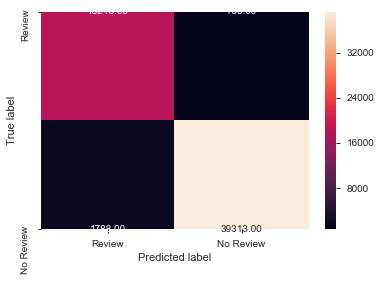

In [210]:
#Confusion Matrix Plot
%matplotlib inline
tree_cm = metrics.confusion_matrix( predictions_train,
                                 y_train_final, labels = [1,0])
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ['Review', 'No Review'] , yticklabels = ['Review', 'No Review'] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Note: This is more accurately identifying the review =1 indicator

18218/20006 = 91%

In [211]:
#Predicting the test cases
predictions_train_df = pd.DataFrame( { 'actual':  y_train_final,
                            'predicted': predictions_train } )

In [212]:
probs_train_df = pd.DataFrame(probs_train)

In [213]:
train_pred = pd.concat( [predictions_train_df, probs_train_df], axis = 1 )

In [214]:
train_pred.columns = ['actual', 'predicted', 'Review_0', 'Review_1']

In [215]:
train_pred.head(10)

,actual,predicted,Review_0,Review_1
0,0,0,1.000000,0.000000
1,0,0,0.970000,0.030000
2,1,1,0.301754,0.698246
3,0,0,1.000000,0.000000
4,0,0,0.940000,0.060000
5,1,0,0.554500,0.445500
6,0,0,0.990000,0.010000
7,0,0,0.970000,0.030000
8,0,0,1.000000,0.000000
9,1,1,0.000000,1.000000


In [216]:
#Score for test Datasets
score = clf.score(df_test[cols], df_test['review'])
print("Accuracy: ", score)

Accuracy:  0.914438


In [217]:
df_test['prob_true'] = probs[:, 1]

In [218]:
#Anomalous data based on the predicted probability value > 0.5
df_anomalous= df_test[df_test['prob_true'] > 0.5 ]
df_anomalous['prob_true'].count()

42781

There are 42781 patient who are showing as anomalous - review predicted as 1 (having prediction prob > 0.5)

In [219]:
df_anomalous.head()

,id,count,proc_1,proc_2,proc_3,proc_4,proc_5,proc_6,proc_7,proc_8,...,proc_126,proc_127,proc_128,proc_129,proc_130,income_group,age_group,gender_group,review,prob_true
23,39897,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,1,0,0.700000
30,47601,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0.810000
54,115182,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,3,0,0,0.690000
56,118059,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0.560000
60,119351,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0.518129


In [220]:
df_id_review = df_anomalous['id']

#### Refining the anomalous patient by K-MEANS Cluster Analysis

Using clustering determine the anomalous patients

A. Feature importance - Using Recursive feature elmination (top 20).

B. Using K-MEANS to check if the anomalous participants are clustering together.


In [221]:
indices = np.argsort(clf.feature_importances_)[::-1]

#### Using KBest for selecting features

In [222]:
from sklearn.feature_selection import SelectKBest, f_regression

In [223]:
X = X_train_final
X_new = SelectKBest(f_regression, k=20).fit(X, y_train_final)
KBest_features = X.columns[X_new.get_support()]

KBest_features

Index(['proc_1', 'proc_11', 'proc_112', 'proc_117', 'proc_124', 'proc_13',
       'proc_14', 'proc_17', 'proc_19', 'proc_2', 'proc_20', 'proc_22',
       'proc_28', 'proc_3', 'proc_34', 'proc_69', 'proc_70', 'proc_9',
       'proc_92', 'proc_99'],
      dtype='object')

#### Using Random Forest to find important features

In [224]:
clf.feature_importances_

array([0.0669417 , 0.13314328, 0.02287771, 0.07893937, 0.0089334 ,
       0.00033261, 0.00170779, 0.0009073 , 0.00472403, 0.00154112,
       0.00210876, 0.00179715, 0.00344266, 0.00131561, 0.00097368,
       0.00679968, 0.0079306 , 0.0029834 , 0.0034387 , 0.00629708,
       0.0049916 , 0.0063879 , 0.00120548, 0.0042516 , 0.00770557,
       0.00147742, 0.00180412, 0.00274955, 0.00156679, 0.00465889,
       0.00209885, 0.00151525, 0.00937297, 0.00559501, 0.0049327 ,
       0.00205462, 0.00129823, 0.00163563, 0.01161369, 0.00264103,
       0.01138327, 0.00275937, 0.00549342, 0.01752956, 0.00387351,
       0.02010759, 0.01035676, 0.01184536, 0.00039729, 0.01207364,
       0.00222601, 0.0020167 , 0.04958814, 0.05495018, 0.04638464,
       0.01470557, 0.0043768 , 0.01174316, 0.003617  , 0.0052572 ,
       0.00373233, 0.00459328, 0.01468418, 0.00203609, 0.00673681,
       0.00148332, 0.00301174, 0.0015383 , 0.0015119 , 0.00194167,
       0.00403302, 0.0031057 , 0.00478316, 0.00670406, 0.00641

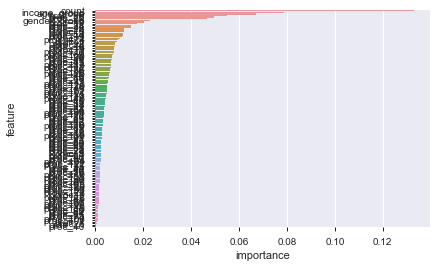

In [225]:
#Plot for features and their respective importance in Random Forest Classification Model.
indices = np.argsort(clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train_final.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train_final.columns[indices[f]],
                         clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )
sns.set(rc={'figure.figsize':(10,16)})

In [226]:
selected_features = feature_rank['feature'].head(20).to_list()

In [227]:
#Selecting top 20 features for clustering
selected_features

['count',
 'income_group',
 'age_group',
 'proc_26',
 'proc_25',
 'proc_27',
 'gender_group',
 'proc_19',
 'proc_17',
 'proc_28',
 'proc_34',
 'proc_22',
 'proc_20',
 'proc_3',
 'proc_13',
 'proc_14',
 'proc_99',
 'proc_2',
 'proc_124',
 'proc_1']

#### Note: Merging the anomalous data with review data(5000 patients) to check if patients are coming together in specific clusters.

In [228]:
df_subdata = df_anomalous.drop('prob_true', axis =1)

In [229]:
frames = [df_subdata, review_dataset]
medical_data = pd.concat(frames)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [230]:
medical_data.head()

,age_group,count,gender_group,id,income_group,proc_1,proc_10,proc_100,proc_101,proc_102,...,proc_91,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99,review
23,2,4,1,39897,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,4,2,0,47601,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,3,3,0,115182,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
56,4,2,0,118059,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,2,2,0,119351,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
analysis_data = medical_data[selected_features]

In [232]:
analysis_data.head()

,count,income_group,age_group,proc_26,proc_25,proc_27,gender_group,proc_19,proc_17,proc_28,proc_34,proc_22,proc_20,proc_3,proc_13,proc_14,proc_99,proc_2,proc_124,proc_1
23,4,2,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
30,2,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,3,4,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56,2,1,4,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
60,2,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [233]:
col_list = analysis_data.columns

In [234]:
col_list

Index(['count', 'income_group', 'age_group', 'proc_26', 'proc_25', 'proc_27',
       'gender_group', 'proc_19', 'proc_17', 'proc_28', 'proc_34', 'proc_22',
       'proc_20', 'proc_3', 'proc_13', 'proc_14', 'proc_99', 'proc_2',
       'proc_124', 'proc_1'],
      dtype='object')

In [235]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

In [236]:
sc=StandardScaler()

In [237]:
analysis_scaled=sc.fit_transform(analysis_data)

In [238]:
#Applying PCA
from sklearn.decomposition import PCA

In [239]:
var_ratio={}
for n in range(2,20):
    pc = PCA(n_components=n)
    analysis_pca=pc.fit(analysis_scaled)
    var_ratio[n]=sum(analysis_pca.explained_variance_ratio_)

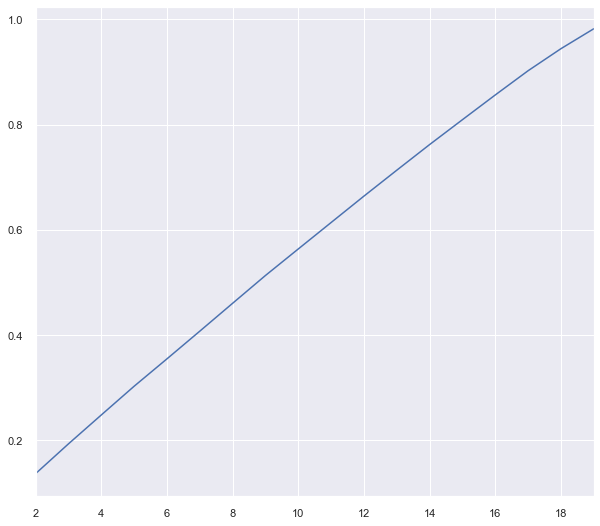

In [240]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,9)})
pd.Series(var_ratio).plot()

In [241]:
var_ratio

{2: 0.13670811854037246,
 3: 0.19328392461911384,
 4: 0.2481707140300023,
 5: 0.3027563146707578,
 6: 0.35479887707960384,
 7: 0.4074015074042061,
 8: 0.46038750224697345,
 9: 0.5132073220191103,
 10: 0.5636290529624092,
 11: 0.6138794610537947,
 12: 0.6640611494689639,
 13: 0.7132747931944551,
 14: 0.7620028770892533,
 15: 0.8092948743566191,
 16: 0.8562849568169991,
 17: 0.9023366799975462,
 18: 0.9442246757423264,
 19: 0.9820899886461318}

In [242]:
# 16 component is defining 85% of variability
pc_final=PCA(n_components=16).fit(analysis_scaled)
reduced_cr=pc_final.fit_transform(analysis_scaled)

In [243]:
reduced_cr.shape

(47781, 16)

In [244]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(16)], index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
count,0.685849,0.156883,0.028580,0.091959,0.029401,0.051347,0.050664,0.046543,0.047915,0.036094,-0.043879,-0.033183,-0.079660,-0.053159,0.033867,-0.004198
income_group,-0.119819,0.608265,0.020402,0.183930,0.052867,-0.181193,-0.045375,-0.014455,0.055513,0.062567,-0.015891,-0.080784,0.034920,0.054716,0.152996,-0.002462
age_group,-0.003853,-0.564243,0.241775,0.288460,0.009376,-0.089960,-0.005539,-0.052563,-0.077252,0.091267,-0.009287,-0.119473,0.016682,0.111595,0.011493,0.211326
proc_26,0.444524,0.100405,0.330034,0.104748,-0.071270,0.248482,0.016326,0.186993,0.117616,0.059236,0.029683,-0.092805,-0.240810,-0.091007,-0.169315,0.003902
proc_25,0.370453,-0.101673,-0.271011,0.142742,0.393421,-0.291688,-0.036556,-0.064401,-0.033201,0.078039,-0.073113,0.010584,0.075607,0.149459,0.437939,0.323984
proc_27,0.351883,-0.050169,0.078147,-0.297182,-0.414321,-0.201526,0.049719,-0.325957,-0.277917,0.162144,-0.027483,-0.029813,0.172372,0.107425,-0.118420,-0.290430
gender_group,0.028556,0.068946,-0.267852,0.355100,-0.213507,0.234069,-0.061527,-0.078709,-0.233722,0.037044,-0.086966,0.182087,0.142634,0.018845,-0.503060,0.514298
proc_19,0.133265,0.013958,-0.444055,-0.029620,0.157491,0.276001,-0.570269,-0.122289,0.122726,-0.161004,0.198325,-0.096558,-0.041566,-0.117911,-0.096185,-0.218361
proc_17,0.009787,-0.052195,-0.399021,0.225167,-0.301570,-0.016543,0.532289,0.286709,0.392779,-0.056374,0.039356,-0.106214,-0.128581,0.003259,0.023277,-0.091764
proc_28,-0.101736,0.106556,0.170362,0.161998,0.326305,0.275163,0.321850,-0.377960,-0.102986,0.270445,0.050949,-0.189093,-0.019189,-0.510247,0.028893,-0.005266


In [245]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(16)])

PC_0     0.076006
PC_1     0.061802
PC_2     0.056928
PC_3     0.055475
PC_4     0.054042
PC_5     0.053465
PC_6     0.052317
PC_7     0.052095
PC_8     0.051108
PC_9     0.050390
PC_10    0.050250
PC_11    0.050182
PC_12    0.049214
PC_13    0.048728
PC_14    0.047292
PC_15    0.046990
dtype: float64

#### Clustering

In [246]:
#Silhoutte Coefficient
from sklearn import metrics
from sklearn.cluster import KMeans

In [275]:
# calculate SC for K=3 through K=15
k_range = range(3, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(analysis_scaled)
    scores.append(metrics.silhouette_score(analysis_scaled, km.labels_))

In [276]:
scores

[0.08489561724765413,
 0.10092025458705464,
 0.27136328103421664,
 0.15815640418047944,
 0.14548713417459055,
 0.17094616338240343,
 0.1701761132493982,
 0.18540878874719652,
 0.17161791910878127,
 0.22295934821844987,
 0.19526981774225774,
 0.2317578434866169]

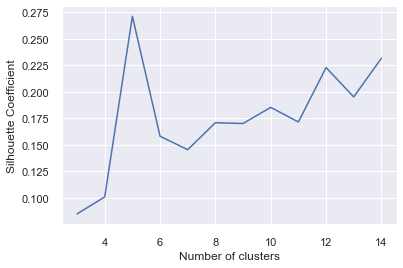

In [277]:
# plot the results
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Silhouette Coefficient shows 5 Cluster should be appropriate in this case

In [281]:
km_5=KMeans(init='k-means++', n_clusters=5,random_state=123)

In [282]:
km_5.fit(reduced_cr)
km_5.labels_

array([2, 2, 1, ..., 2, 2, 2])

In [283]:
pd.Series(km_5.labels_).value_counts()

2    33207
1    11385
3     1154
4     1076
0      959
dtype: int64

Text(0.5, 0, 'PC_5')

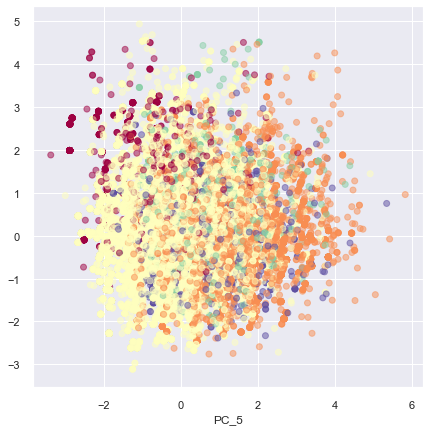

In [284]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_5')

In [285]:
km_5 = pd.DataFrame(km_5.labels_)

In [286]:
km_5.count()

0    47781
dtype: int64

In [287]:
medical_data = medical_data.reset_index()

In [288]:
cluster_df_5= pd.concat([medical_data, km_5], axis=1)

In [289]:
cluster_df_5.rename(columns={0: 'KMEANS_5'}, inplace=True)

In [290]:
cluster_df_5.to_csv('cluster_df_5.csv')

In [291]:
cluster_df_5.head()

,level_0,index,age_group,count,gender_group,id,income_group,proc_1,proc_10,proc_100,...,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99,review,KMEANS_5
0,0,23,2,4,1,39897,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,30,4,2,0,47601,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,2,54,3,3,0,115182,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,56,4,2,0,118059,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,60,2,2,0,119351,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [292]:
cluster_to_audit = cluster_df_5[['id', 'review', 'KMEANS_5']]

In [300]:
cluster_to_audit.to_excel('Part3_cluster_analysis.xlsx')

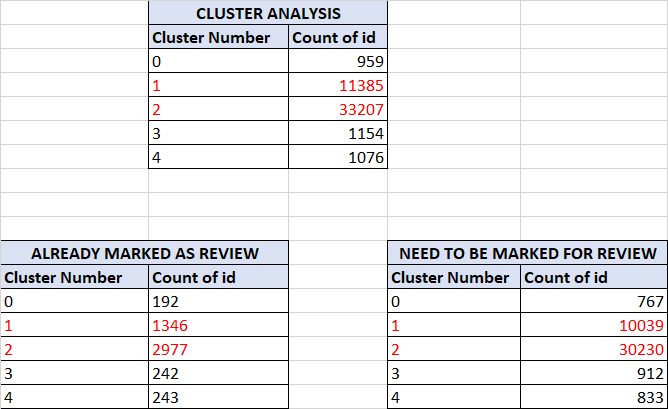

KMEANS gives us the anomalous patients are getting clustered at Cluster 2 (highest) and Cluster 1 (next high)

#### Results

#### Unmarked patients at Cluster 2 needs to be reviewed with high priority followed by Cluster 1

#### Cluster 2 has 30230 and Cluster 1 has 10039 anomalous patients who are detected for review